<a href="https://colab.research.google.com/github/CristinaMarsh/Data/blob/main/Reanalysis/2023_7_18_%E5%B8%B8%E7%94%A8%E6%B0%94%E8%B1%A1%E6%95%B0%E6%8D%AE%E8%8E%B7%E5%8F%96%E6%8C%87%E5%8D%97%EF%BC%88%E4%B8%8E%E5%88%86%E5%B7%A5%EF%BC%89_%E6%9C%AA%E5%AE%8C%E6%88%90.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://www.heywhale.com/mw/project/5f6369c5ae300e00460584b9


常见数据源
1. 站点数据

1.1 中国气象数据网（这是最官方的数据平台）by 哈哈
1.2 AWOS 机场观测数据 by
1.3 NOAA 全球地面站观测数据 by 哈哈
1.4 全球探空数据 by 洋流
1.5 全国空气质量观测数据 by ✘、哈哈、洋流
1.6 MODIS 极轨卫星数据 by 178058008
1.7 国家冰川冻土沙漠科学数据中心 by
2. 格点数据

2.1 NCEP FNL 再分析数据 常用的气象再分析数据 by 洋流
2.2 NCEP-DOE Reanalysis 2 再分析数据 by Guo
2.3 ERA5 数据 by Guo、洋流、哈哈
2.4 GFS/GDAS 数据 最常用的气象预报数据 by Guo
2.5 葵花 8 号 Himawari-8 卫星数据 by 哈哈、洋流
3. 其他（欢迎补充）

3.1 TEMIS遥感数据 by 洋流
3.2 我国台风历史轨迹数据 by 洋流
1. 站点数据
1.1 中国气象数据网（这是最官方的数据平台）by 哈哈(代码待补充）
中国气象数据网是官网平台，需要注册才能使用，分普通用户，个人实名用户，科研用户。数据种类很丰富，唯一的不足是下载需要权限。当然，很多气象数据的密级为秘密，大家在使用分享时一定要注意哦！网站也提供接口服务，可以免费使用7天。

国家气象科学数据中http://data.cma.cn/site/index.html

1.2 AWOS 机场观测数据 by
1.3 NOAA 全球地面站观测数据 by 哈哈
"The Global Historical Climatology Network (GHCN) is an integrated database of climate summaries from land surface stations across the globe that have been subjected to a common suite of quality assurance reviews. The data are obtained from more than 20 sources. Some data are more than 175 years old while others are less than an hour old. GHCN is the official archived dataset, and it serves as a replacement product for older NCEI-maintained datasets that are designated for daily temporal resolution (i.e., DSI 3200, DSI 3201, DSI 3202, DSI 3205, DSI 3206, DSI 3208, DSI 3210, etc.)." From Global Historical Climatology Network (GHCN): https://www.ncdc.noaa.gov/data-access/land-based-station-data/land-based-datasets/global-historical-climatology-network-ghcn

数据下载： ftp://ftp.ncdc.noaa.gov/pub/data/ghcn/daily/
数据读取示例： https://github.com/BeiTown/WeatherAnalysis

数据是按站点存放的，可以根据需求下载需要的数据。在数据下载链接的根目录下，“readme.txt”文件对数据的存在格式等进行了说明。准实时更新~

（代码待补充)

1.4 全球探空数据 by 洋流
探空站一般是为探测高空气象要素而建立的，通过探空气球来收集每天8点和20点的高空气象数据，遇到特殊天气(台风等)会进行加密观测。可以获近地层、850、700、500、200百帕的温度、温度露点差、位势高度、风速风向等气象要素。探空数据在天气预报有着重要的指示作用，可以分析出高空引导气流的位置、强度，及到达本地的时间和对当地天气的影响情况。

数据来自怀俄明大学：http://weather.uwyo.edu/upperair/seasia.html
我国的探空站表格：http://data.cma.cn/article/showPDFFile.html?file=/pic/static/doc/B/B.0011.0001C/UPAR_CHN_MUL_STATION.pdf

### 1.4.1 批量下载数据

In [ ]:
! pip install siphon

In [ ]:
! pip install metpy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 400.5/400.5 kB 12.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.0/294.0 kB 24.5 MB/s eta 0:00:00


In [ ]:
#导入模块
import datetime
from metpy.units import units
from siphon.simplewebservice.wyoming import WyomingUpperAir

In [ ]:
# 设置下载时段（这里是UTC时刻）
start = datetime.datetime(2020, 1, 1, 0)
end = datetime.datetime(2020, 1, 3, 0)


In [ ]:
datelist = []
while start<=end:
    datelist.append(start)
    start+=datetime.timedelta(hours=12)

# 选择下载站点（以上海宝山站为例）
stationlist = ['58362']

# 批量下载
for station in stationlist:
    for date in datelist:
        try:
            df = WyomingUpperAir.request_data(date, station)
            df.to_csv(station+'_'+date.strftime('%Y%m%d%H')+'.csv',index=False)
            print(date.strftime('%Y%m%d_%H')+'下载成功')
        except:
            print(date.strftime('%Y%m%d_%H')+'下载失败')
            pass

20200101_00下载失败
20200101_12下载成功
20200102_00下载成功
20200102_12下载成功
20200103_00下载成功


### 1.4.2 读取示例数据
数据包含气压、高度、气温、露点、风向、风速、经向风速、纬向风速，还包含探空战观测时刻、经纬度和高程信息。

In [ ]:
import pandas as pd
df = pd.read_csv('/content/58362_2020010300.csv')
df

,pressure,height,temperature,dewpoint,direction,speed,u_wind,v_wind,station,station_number,time,latitude,longitude,elevation,pw
0,1027.0,4,9.8,9.3,250.0,2.0,1.879385,6.840403e-01,NaN,58362,2020-01-03,31.4,121.46,4.0,23.7
1,1007.0,172,9.1,8.9,315.0,2.0,1.414214,-1.414214e+00,NaN,58362,2020-01-03,31.4,121.46,4.0,23.7
2,1000.0,231,8.8,8.8,325.0,2.0,1.147153,-1.638304e+00,NaN,58362,2020-01-03,31.4,121.46,4.0,23.7
3,967.0,508,7.6,7.6,20.0,4.0,-1.368081,-3.758770e+00,NaN,58362,2020-01-03,31.4,121.46,4.0,23.7
4,929.0,838,6.2,6.2,10.0,2.0,-0.347296,-1.969616e+00,NaN,58362,2020-01-03,31.4,121.46,4.0,23.7
5,925.0,874,6.0,6.0,0.0,2.0,-0.000000,-2.000000e+00,NaN,58362,2020-01-03,31.4,121.46,4.0,23.7
6,890.0,1189,5.2,5.2,245.0,6.0,5.437847,2.535710e+00,NaN,58362,2020-01-03,31.4,121.46,4.0,23.7
7,853.0,1536,4.3,4.3,235.0,10.0,8.191520,5.735764e+00,NaN,58362,2020-01-03,31.4,121.46,4.0,23.7
8,850.0,1565,4.2,4.2,240.0,10.0,8.660254,5.000000e+00,NaN,58362,2020-01-03,31.4,121.46,4.0,23.7
9,818.0,1877,3.4,3.4,270.0,14.0,14.000000,2.571758e-15,NaN,58362,2020-01-03,31.4,121.46,4.0,23.7


# 1.5 全国空气质量观测数据 by ✘、哈哈、洋流
（by ✘、哈哈）

大佬将中国环境监测总站的全国城市空气质量实时发布平台的数据爬下来分享，免费下载，每周更新~

网址：https://quotsoft.net/air/

全国国控监测点数据 CSV格式 https://quotsoft.net/air/data/china_sites_[日期].csv
全国城市数据 CSV格式 https://quotsoft.net/air/data/china_cities_[日期].csv
北京PM2.5/PM10/AQI数据 CSV格式 https://quotsoft.net/air/data/beijing_all_[日期].csv
北京SO2/NO2/O3/CO数据 CSV格式 https://quotsoft.net/air/data/beijing_extra_[日期].csv

例如:
https://quotsoft.net/air/data/china_sites_20200820.csv
填写日期即可

（by 洋流）

网站：http://www.pm25.in
参考：爬取实时空气质量数据

In [ ]:
! pip install bs4

  Preparing metadata (setup.py) ... done
  Created wheel for bs4: filename=bs4-0.0.1-py3-none-any.whl size=1257 sha256=efce91e0db259b30e22bf433b4c555442e0a5e0b065dfce6b4d5efcdd15da5de
  Stored in directory: /root/.cache/pip/wheels/25/42/45/b773edc52acb16cd2db4cf1a0b47117e2f69bb4eb300ed0e70
Successfully built bs4


In [ ]:
import csv
import os
import requests
from bs4 import BeautifulSoup

In [ ]:
from bs4 import BeautifulSoup

def get_city_aqi(city_pinyin):
    url = "http://www.pm25.in/" + city_pinyin
    r = requests.get(url,timeout=30)
    soup = BeautifulSoup(r.text,"html.parser")
    div_list = soup.find_all("div",{"class":"span1"})
    city_aqi = []
    livetime = soup.find_all("div",{"class":"live_data_time"})
    city_aqi.append(livetime[0].text.strip()[7:])
    for i in range(8):
        div_content = div_list[i]
        value = div_content.find("div",{"class":"value"}).text.strip()
        caption = div_content.find("div",{"class":"caption"}).text.strip()
        city_aqi.append(value)
    #print(city_aqi)
    return city_aqi

def get_all_cities():
    url = "http://www.pm25.in/"
    r = requests.get(url, timeout=30)
    soup = BeautifulSoup(r.text, "html.parser")
    city_list = []
    city_div = soup.find_all("div",{"class":"city"})
    for i, city_link in enumerate(city_div):
        city_name = city_link.text
        city_pinyin = city_link["href"][1:]
        city_list.append((city_name,city_pinyin))
    return city_list

city_list = get_all_cities()
header = ["city","time","AQI","PM2.5/1h","PM10/1h","CO/1h","NO2/1h","O3/1h","O3/8h","SO2/1h"]
with open("city_air_quality_aqi.csv","w",encoding="utf-8",newline="") as f:
    writer = csv.writer(f)
    writer.writerow(header)
    for i, city in enumerate(city_list):
        if (i+1)%10 == 0:
            print("Saving {} Data (Total {} Data)".format(i + 1,len(city_list)))
        city_name = city[0]
        city_pinyin = city[1]
        city_aqi = get_city_aqi(city_pinyin)
        row = [city_name] + city_aqi
        writer.writerow(row)



In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('/content/city_air_quality_aqi.csv')

1.6 MODIS 极轨卫星数据 by 178058008
（by 178058008）

MODIS数据目前比较全面的是在https://ladsweb.modaps.eosdis.nasa.gov/search/或者地理空间云

进入以后注册NASA账户，记得申请apikey

http://https//ladsweb.modaps.eosdis.nasa.gov/profile/#app-keys
这个网站下载推荐python脚本方法

我常用的下载命令：

python laads-data-download.py -s https://ladsweb.modaps.eosdis.nasa.gov/archive/orders/501412572 -d E:\temp\ -t <这里写apikey，不要两侧的括号>


1.7 国家冰川冻土沙漠科学数据中心 by
# 2. 格点数据
## 2.1 NCEP FNL 再分析数据（常用的气象再分析数据）by 洋流
数据下载自NCAR：https://rda.ucar.edu/
需要自行注册账户，最好是edu结尾的邮箱。

NCEP的FNL资料：http://rda.ucar.edu/data/ds083.2
空间分辨率：1°×1°
时间分辨率：逐6小时


## 2.2.1 批量下载
主要3个参数

start[int]:数据下载起始年份<br>
end[int]:数据下载种植年份<br>
url[string]：待下载数据连接<br>

In [16]:
! pip uninstall xarray

Found existing installation: xarray 2022.12.0
Uninstalling xarray-2022.12.0:
  Would remove:
    /usr/local/lib/python3.10/dist-packages/xarray-2022.12.0.dist-info/*
    /usr/local/lib/python3.10/dist-packages/xarray/*
Proceed (Y/n)? y
  Successfully uninstalled xarray-2022.12.0


In [2]:
!pip install xarray[complete]

In [2]:
# 2.1.1 批量下载数据

import requests
import datetime

In [3]:
# 定义登录函数
def builtSession():
    email = "zhengjing.ma@cugb.edu.cn"    #此处改为注册邮箱
    passwd = "Mazhengjing2023"                      #此处为登陆密码
    loginurl = "https://rda.ucar.edu/cgi-bin/login"
    params = {"email":email, "password":passwd, "action":"login"}
    sess = requests.session()
    sess.post(loginurl,data=params)
    return sess

# 定义下载函数
def download(sess, dt):
    g1 = datetime.datetime(1999,7,30,18)
    g2 = datetime.datetime(2007,12,6,12)
    if dt >= g2:
        suffix = "grib2"
    elif dt >= g1 and dt <g2:
        suffix = "grib1"
    else:
        raise StandardError("DateTime excess limit")
    url = "http://rda.ucar.edu/data/ds083.2"
    folder = "{}/{}/{}.{:0>2d}".format(suffix, dt.year, dt.year, dt.month)
    filename = "fnl_{}.{}".format(dt.strftime('%Y%m%d_%H_00'), suffix)
    fullurl = "/".join([url, folder, filename])
    r = sess.get(fullurl)
    with open(filename, "wb") as fw:
        fw.write(r.content)
    print(filename + " downloaded")

# 批量下载
if __name__ == '__main__':
    print("downloading...")
    s = builtSession()
    for i in range(2):    #共下载多少个时次
        startdt = datetime.datetime(2018, 5, 16, 0)  #开始时次
        interval = datetime.timedelta(hours = i * 6)
        dt =startdt + interval
        download(s,dt)
    print("download completed!")

downloading...
fnl_20180516_00_00.grib2 downloaded
fnl_20180516_06_00.grib2 downloaded
download completed!


In [1]:
!pip install xarray cfgrib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.1/47.1 kB 967.1 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 33.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Created wheel for eccodes: filename=eccodes-1.6.0-py3-none-any.whl size=40959 sha256=70917f56a5a426fa4e7509ff6b2ac7f16f9836e114145bd98c9b037ad407b62b
  Stored in directory: /root/.cache/pip/wheels/4e/c2/01/779f6bbee8f7aeaa40b9070ac75bf0c9d9b810776bf2790a5c
  Created wheel for findlibs: filename=findlibs-0.0.5-py3-none-any.whl size=6944 sha256=c2a47a2130a1962df1a75dad52acfa80ceb09d934b31e25db60aa45577dd563d
  Stored in directory: /root/.cache/pip/wheels/2e/67/14/22fa5b9fd9c41be520b37e908597d6a262803c0fcf2ba7c2c3
Successfully built eccodes findlibs


In [13]:
!pip install pynio

ERROR: Could not find a version that satisfies the requirement pynio (from versions: none)
ERROR: No matching distribution found for pynio


In [10]:
import xarray as xr
import cfgrib

# Open the file
ds = xr.open_dataset('./fnl_20180516_00_00.grib2', engine='cfgrib')

# Print the content
print(ds)

RuntimeError: ignored

In [12]:
import xarray as xr
ds = xr.open_dataset('./fnl_20180516_00_00.grib2',engine='pynio')

ValueError: ignored

## 2.2 NCEP-DOE Reanalysis 2 再分析数据 by Guo
NCEP-DOE Reanalysis 2 is an improved version of the NCEP Reanalysis I model that fixed errors and updated paramterizations of physical processes.
这个数据比较好下，页面点一下就好了。

数据下载：https://psl.noaa.gov/data/gridded/data.ncep.reanalysis2.html
空间分辨率：2.5°×2.5°
时间分辨率：逐6小时
时间尺度：1979/01/01 to 2020/07/31

## 2.2.1 批量下载
主要3个参数

- start[int]:数据下载起始年份
- end[int]:数据下载种植年份
- url[string]：待下载数据连接

In [22]:
import requests
import lxml.html
import urllib

def dload_gfs(url, start, end, out_path='/content/'):
    try:
        html = requests.get(url).text
    except Exception as e:
        print(e)
    else:
        doc = lxml.html.fromstring(html)
        results = doc.xpath('//a/@href')
        for link in results:
            if '.nc' in link:
                time = int(link.split('.')[-2])
                print(link)
                if time >= start and time <= end:
                    print(f'downloading {link} ...')
                    try:
                        r = urllib.request.urlopen(link, timeout=30).read()
                    except Exception as e:
                        print(e)
                    else:
                        with open(out_path + link.split('/')[-1], "wb") as f:
                            f.write(r)




In [24]:

url = 'https://psl.noaa.gov/cgi-bin/db_search/DBListFiles.pl?did=59&tid=81620&vid=4241'
start = 1979
end = 1981
#out_path = '/content/sample_data'
dload_gfs(url, start, end)

https://psl.noaa.gov/cgi-bin/db_search/DBListFiles.pl?did=59&tid=81620&vid=4241

直接用连接下载https://psl.noaa.gov/data/gridded/?did=59&tid=81620&vid=4241

In [25]:
! wget https://downloads.psl.noaa.gov/Datasets/COBE/sst.mon.ltm.1981-2010.nc

--2023-07-21 00:51:00--  https://downloads.psl.noaa.gov/Datasets/COBE/sst.mon.ltm.1981-2010.nc
Resolving downloads.psl.noaa.gov (downloads.psl.noaa.gov)... 140.172.38.86
Connecting to downloads.psl.noaa.gov (downloads.psl.noaa.gov)|140.172.38.86|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3068324 (2.9M) [application/x-netcdf]
Saving to: ‘sst.mon.ltm.1981-2010.nc’

sst.mon.ltm.1981-20 100%[===================>]   2.93M  --.-KB/s    in 0.09s   

2023-07-21 00:51:00 (34.0 MB/s) - ‘sst.mon.ltm.1981-2010.nc’ saved [3068324/3068324]



# 2.3 ERA 数据 by Guo、洋流、哈哈
## ERA-Interim
ERA-Interim is a global atmospheric reanalysis that is available from 1 January 1979 to 31 August 2019. It has been superseded by the ERA5 reanalysis.
The data assimilation system used to produce ERA-Interim is based on a 2006 release of the IFS (Cy31r2). The system includes a 4-dimensional variational analysis (4D-Var) with a 12-hour analysis window. The spatial resolution of the data set is approximately 80 km (T255 spectral) on 60 levels in the vertical from the surface up to 0.1 hPa.
For a detailed documentation of the ERA-Interim Archive see Berrisford et al. (2011).
An open-access journal article describing the ERA-Interim reanalysis is available from the Quarterly Journal of the Royal Meteorological Society. Additional details of the modelling and data assimilation system used to produce ERA-Interim can be found in the IFS documentation Cy31r1. We are aware of several quality issues with ERA-Interim data.


下载地址：https://apps.ecmwf.int/datasets/data/interim-full-daily/levtype=sfc/
接口下载：批量下载ECMWF数据的正确姿势

## ERA5
A first segment of the ERA5 dataset is now available for public use (1979 to within 5 days of real time). ERA5 provides hourly estimates of a large number of atmospheric, land and oceanic climate variables. The data cover the Earth on a 30km grid and resolve the atmosphere using 137 levels from the surface up to a height of 80km. ERA5 includes information about uncertainties for all variables at reduced spatial and temporal resolutions.
Quality-assured monthly updates of ERA5 are published within 3 months of real time. Preliminary daily updates of the dataset are available to users within 5 days of real time.
The entire ERA5 dataset from 1950 to present is expected to be available for use in 2020.
ERA5 combines vast amounts of historical observations into global estimates using advanced modelling and data assimilation systems.
ERA5 replaces the ERA-Interim reanalysis which stopped being produced on 31 August 2019. You can read about the key characteristics of ERA5 and important changes relative to ERA-Interim.

下载网站：https://cds.climate.copernicus.eu/
步骤：
1、注册账号，最好是edu结尾的邮箱
2、获取api秘钥，存在工作区下的.cdsapirc
3、检索数据
4、构建下载脚本，主要参数如下，支持grib格式和nc格式

接口下载详见：https://www.heywhale.com/mw/project/5f2ac754af3980002cb1bc95



In [32]:
! pip install cdsapi

  Preparing metadata (setup.py) ... done
  Created wheel for cdsapi: filename=cdsapi-0.6.1-py2.py3-none-any.whl size=12009 sha256=b296bbb0badc69e4bc6c555769e6766971375cc5d841eb64f35ac521888ec50f
  Stored in directory: /root/.cache/pip/wheels/7c/63/08/45461d6f6636c1aba7846828d8c787a064073945048f76d44a
Successfully built cdsapi


In [35]:
import cdsapi
#import getpass to ask user's key
import getpass

url = 'url: https://cds.climate.copernicus.eu/api/v2'

UID_KEY = getpass.getpass()
key = 'key: ' + UID_KEY


··········


In [36]:
with open('/root/.cdsapirc', 'w') as f:
    f.write('\n'.join([url, key]))

In [38]:
!pip install cdsapi

In [42]:
url = 'url: https://cds.climate.copernicus.eu/api/v2'
key = 'key: 117001:448bd51e-d40e-4385-b677-f0c758c3ed76'

with open('/root/.cdsapirc', 'w') as f:
    f.write('\n'.join([url, key]))

with open('/root/.cdsapirc') as f:
    print(f.read())

url: https://cds.climate.copernicus.eu/api/v2
key: 117001:448bd51e-d40e-4385-b677-f0c758c3ed76


In [43]:
import cdsapi
cdsapi.Client()

In [44]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [45]:
import xarray as xr #for data processing
from urllib.request import urlopen

#api to retrieve datasets
c = cdsapi.Client()

#flag to download data
download_flag = False

dataset = 'reanalysis-era5-single-levels-monthly-means'

# API parameters
params = {
    'format': 'netcdf',
    'variable': ['total_precipitation', '2m_temperature'],
    'product_type': 'monthly_averaged_reanalysis',
    'expver': '1',
    'year': [
            '1981', '1982', '1983','1984', '1985', '1986','1987', '1988', '1989',
            '1990', '1991', '1992','1993', '1994', '1995','1996', '1997', '1998',
            '1999', '2000', '2001','2002', '2003', '2004','2005', '2006', '2007',
            '2008', '2009', '2010','2011', '2012', '2013','2014', '2015', '2016',
            '2017', '2018', '2019','2020'],
    'month':['01', '02', '03', '04', '05', '06', '07', '08', '09','10', '11', '12'],
    'time': '00:00',
    'area': [-7.15, -41.5, -9.6, -35],
    }

#choose a google drive directory
PernambucoERA5 = './drive/MyDrive/CRH/PernambucoERA5.nc'

#File generated by specified parameters
fl = c.retrieve(dataset, params)

#If the flag is True, the file will be downloaded in netcdf and
#persisted in specified directory on google drive.
#If the image is already there, the flag should be false
if download_flag:
  fl.download(PernambucoERA5)

#reading the data
with urlopen(fl.location) as f:
    ds = xr.open_dataset(f.read())
    print(ds)

2023-07-21 01:04:04,183 INFO Welcome to the CDS
INFO:cdsapi:Welcome to the CDS
2023-07-21 01:04:04,186 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels-monthly-means
INFO:cdsapi:Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels-monthly-means
2023-07-21 01:04:04,464 INFO Request is queued
INFO:cdsapi:Request is queued
2023-07-21 01:04:05,602 INFO Request is running
INFO:cdsapi:Request is running
2023-07-21 01:08:24,207 INFO Request is completed
INFO:cdsapi:Request is completed


<xarray.Dataset>
Dimensions:    (longitude: 27, latitude: 10, time: 480)
Coordinates:
  * longitude  (longitude) float32 -41.5 -41.25 -41.0 ... -35.5 -35.25 -35.0
  * latitude   (latitude) float32 -7.35 -7.6 -7.85 -8.1 ... -9.1 -9.35 -9.6
  * time       (time) datetime64[ns] 1981-01-01 1981-02-01 ... 2020-12-01
Data variables:
    tp         (time, latitude, longitude) float32 ...
    t2m        (time, latitude, longitude) float32 ...
Attributes:
    Conventions:  CF-1.6
    history:      2023-07-21 01:07:07 GMT by grib_to_netcdf-2.25.1: /opt/ecmw...


In [46]:
ds

<xarray.Dataset>
Dimensions:    (longitude: 27, latitude: 10, time: 480)
Coordinates:
  * longitude  (longitude) float32 -41.5 -41.25 -41.0 ... -35.5 -35.25 -35.0
  * latitude   (latitude) float32 -7.35 -7.6 -7.85 -8.1 ... -9.1 -9.35 -9.6
  * time       (time) datetime64[ns] 1981-01-01 1981-02-01 ... 2020-12-01
Data variables:
    tp         (time, latitude, longitude) float32 ...
    t2m        (time, latitude, longitude) float32 ...
Attributes:
    Conventions:  CF-1.6
    history:      2023-07-21 01:07:07 GMT by grib_to_netcdf-2.25.1: /opt/ecmw...

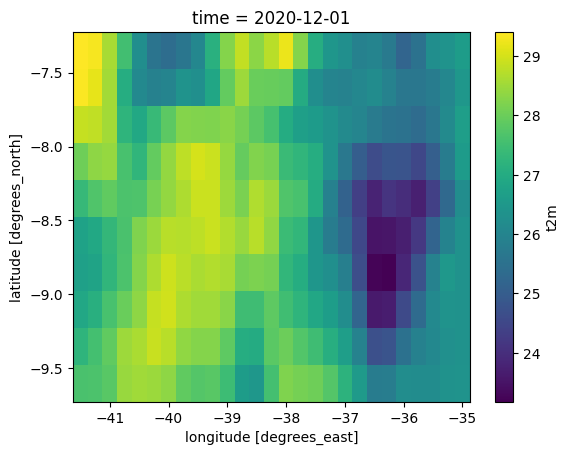

In [47]:
temperatura = ds.t2m - 273.15 #K to ºC
temperatura[479].plot()

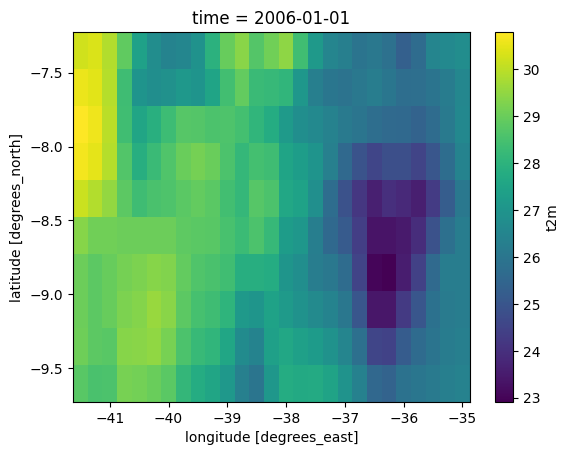

In [49]:
temperatura[300].plot()

In [50]:
#ds to pandas dataframe
df = ds.to_dataframe()

#m to mm conversion
df.loc[:,'tp'] = df.loc[:,'tp']*1000

#K para ºC conversion
df.loc[:,'t2m'] = df.loc[:,'t2m'] - 273.15

df

tp        t2m
longitude latitude time                            
-41.5     -7.35    1981-01-01   4.351404  26.504211
                   1981-02-01   0.993128  28.256012
                   1981-03-01  10.961049  27.177429
                   1981-04-01   1.676493  26.214050
                   1981-05-01   0.006800  27.354950
...                                  ...        ...
-35.0     -9.60    2020-08-01   1.073591  25.054169
                   2020-09-01   1.157453  25.116882
                   2020-10-01   0.602148  25.923248
                   2020-11-01   1.075857  26.252625
                   2020-12-01   1.106078  26.365936

[129600 rows x 2 columns]

## The closest point to the weather station
It’s necessary to create a function to determine which grid point in the NetCDF file is closest to the weather station that will be used. This will facilitate the production of a script without human intervention, making the process much more automatic and without possible failures.

In [51]:
import numpy as np

def geo_idx(dd, dd_array):

   geo_idx = (np.abs(dd_array - dd)).argmin()
   return geo_idx

In [53]:
lats_ERA5 = ds.variables['latitude'][:]
lons_ERA5 = ds.variables['longitude'][:]

lat_idx = geo_idx(-9.39, lats_ERA5)
lon_idx = geo_idx(-40.52, lons_ERA5)

<ipython-input-51-9c2b93f4b43f>:5: DeprecationWarning: Behaviour of argmin/argmax with neither dim nor axis argument will change to return a dict of indices of each dimension. To get a single, flat index, please use np.argmin(da.data) or np.argmax(da.data) instead of da.argmin() or da.argmax().
  geo_idx = (np.abs(dd_array - dd)).argmin()
<ipython-input-51-9c2b93f4b43f>:5: DeprecationWarning: Behaviour of argmin/argmax with neither dim nor axis argument will change to return a dict of indices of each dimension. To get a single, flat index, please use np.argmin(da.data) or np.argmax(da.data) instead of da.argmin() or da.argmax().
  geo_idx = (np.abs(dd_array - dd)).argmin()


In [54]:
print(lat_idx.values) #In this example the lat index is 8
print(lon_idx.values) #In this example the lon index is 4

8
4


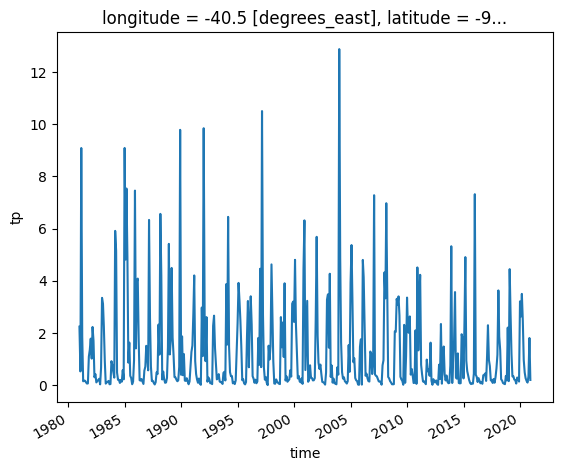

In [55]:
tp = ds.tp * 1000 #scale adjustment
tp.isel(latitude=8, longitude=4).plot() #closest point

## Filtered Table
As the ERA data is float, it is not possible to directly compare the latitude and longitude values, so a delta is used for the query that will return the grid point data closest to the station coordinates that were passed above.

The chosen delta was 0.1, as the grid has a spacing of 0.25.

In [56]:
delta = 0.1
latitude1 = str(lats_ERA5[lat_idx].values + delta )
latitude2 = str(lats_ERA5[lat_idx].values - delta)
longitude1 = str(lons_ERA5[lon_idx].values + delta)
longitude2 = str(lons_ERA5[lon_idx].values - delta)

tabelaEra5 = (df.query('latitude < ' + latitude1 + ' and latitude > ' + latitude2 + ' and longitude < ' + longitude1 + ' and longitude > ' + longitude2))
tabelaEra5

tp        t2m
longitude latitude time                           
-40.5     -9.35    1981-01-01  2.243132  26.472443
                   1981-02-01  0.528485  27.565460
                   1981-03-01  9.087366  25.965332
                   1981-04-01  1.852529  24.651489
                   1981-05-01  0.150726  24.467804
...                                 ...        ...
                   2020-08-01  0.163947  24.956940
                   2020-09-01  0.100862  26.793579
                   2020-10-01  0.338850  29.294128
                   2020-11-01  1.808710  27.216034
                   2020-12-01  0.200968  28.621094

[480 rows x 2 columns]

In [57]:
response_inmet = requests.get('https://apitempo.inmet.gov.br/estacao/diaria/1981-01-01/2020-12-31/82983').json()

df_inmet= pd.DataFrame.from_dict(response_inmet) #json to dataframe
df_inmet['DT_MEDICAO'] =  pd.to_datetime(df_inmet['DT_MEDICAO'], format='%Y-%m-%d') #cast to datetime type
df_inmet.set_index('DT_MEDICAO', inplace=True) #set datetime index
df_inmet["TEMP_MED"] = pd.to_numeric(df_inmet["TEMP_MED"], downcast="float")
df_inmet["CHUVA"] = pd.to_numeric(df_inmet["CHUVA"], downcast="float")

JSONDecodeError: ignored

### ERA5 2

In [58]:
import cdsapi
c = cdsapi.Client()
c.retrieve("reanalysis-era5-single-levels",
           {
               "variable": "total_precipitation",
               "year": "2020",
               "month": "07",
               "day": "13",
               "time": "00:00",
               "format": "grib"
           },
           '2020071300_prep.grib')

2023-07-21 02:03:24,990 INFO Welcome to the CDS
INFO:cdsapi:Welcome to the CDS
2023-07-21 02:03:24,999 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels
INFO:cdsapi:Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels
2023-07-21 02:03:25,168 INFO Request is queued
INFO:cdsapi:Request is queued
2023-07-21 02:03:26,307 INFO Request is running
INFO:cdsapi:Request is running
2023-07-21 02:03:58,299 INFO Request is completed
INFO:cdsapi:Request is completed
2023-07-21 02:03:58,303 INFO Downloading https://download-0000-clone.copernicus-climate.eu/cache-compute-0000/cache/data8/adaptor.mars.internal-1689905005.4011333-22988-15-b513173c-e43c-4e0d-8fe7-7140625d08d1.grib to 2020071300_prep.grib (21.8M)
INFO:cdsapi:Downloading https://download-0000-clone.copernicus-climate.eu/cache-compute-0000/cache/data8/adaptor.mars.internal-1689905005.4011333-22988-15-b513173c-e43c-4e0d-8fe7-7140625d08d1.gri

Result(content_length=22868520,content_type=application/x-grib,location=https://download-0000-clone.copernicus-climate.eu/cache-compute-0000/cache/data8/adaptor.mars.internal-1689905005.4011333-22988-15-b513173c-e43c-4e0d-8fe7-7140625d08d1.grib)

# 2.4 GFS/GDAS 数据 最常用的气象预报数据 by Guo
下载地址：ftp://ftp.ncep.noaa.gov/pub/data/nccf/com/gfs/prod/

2.4 GFS/GDAS 数据 最常用的气象预报数据 by Guo
The Global Forecast System (GFS) has been in NWS operations since 1980 and is continuously improved by the Global Climate and Weather Modeling Branch which conducts a program of research and development in support of the Environmental Modeling Center (EMC) (www.emc.ncep.noaa.gov) of the National Centers for Environmental Prediction (NCEP) (www.ncep.noaa.gov).

## 空间分辨率：0.25°×0.25°
## 时间分辨率：1h
下载地址：https://nomads.ncep.noaa.gov/
参考下载代码(以径向、纬向风为例)：https://github.com/mapbox/webgl-wind/blob/master/data/download.sh

In [67]:
import requests

GFS_DATE = "20161120"
GFS_TIME = "00"  # 00, 06, 12, 18
RES = "1p00"  # 0p25, 0p50 or 1p00
BBOX = "leftlon=0&rightlon=360&toplat=90&bottomlat=-90"
LEVEL = "lev_10_m_above_ground=on"
GFS_URL = f"http://nomads.ncep.noaa.gov/cgi-bin/filter_gfs_{RES}.pl?file=gfs.t{GFS_TIME}z.pgrb2.{RES}.f000&{LEVEL}&{BBOX}&dir=%2Fgfs.{GFS_DATE}{GFS_TIME}"

def download_file(url, filename):
    r = requests.get(url)
    with open(filename, 'wb') as f:
        f.write(r.content)

download_file(GFS_URL + "&var_UGRD=on", 'utmp.grib')
download_file(GFS_URL + "&var_VGRD=on", 'vtmp.grib')

# You may need to install eccodes and use grib_set to change packingType
# !apt-get install -y eccodes
# !grib_set -r -s packingType=grid_simple utmp.grib utmp.grib
# !grib_set -r -s packingType=grid_simple vtmp.grib vtmp.grib


In [68]:
!apt-get install -y eccodes
!grib_set -r -s packingType=grid_simple utmp.grib utmp.grib
!grib_set -r -s packingType=grid_simple vtmp.grib vtmp.grib

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
E: Unable to locate package eccodes
/bin/bash: line 1: grib_set: command not found
/bin/bash: line 1: grib_set: command not found


## 2.5 葵花 8 号 Himawari-8 卫星数据 by 哈哈、洋流
葵8数据下载需要注册，科研用途免费，通过也很快的。

JAXA Himawari Monitor:https://www.eorc.jaxa.jp/ptree/index.html

### 2.5.1 批量下载数据

In [69]:
# 加强版 by 洋流
import os
import sys
import click
import ftplib
import ntpath
from tqdm import tqdm
from datetime import datetime
from datetime import timedelta

def files_list(d1, d2, tstep, product):
    files = []
    step = timedelta(minutes=tstep)
    seconds = (d2-d1).total_seconds()
    # generate basenames
    for i in range(0, int(seconds), int(step.total_seconds())):
        files.append(d1 + timedelta(seconds=i))
    # get all files from sdate to edate by tstep
    files = [date.strftime('%Y%m/%d/%H/') +
             f'*H08_{date.strftime("%Y%m%d_%H%M")}_*_FLDK*nc'
             for date in files]
    return files

def downloadFiles(ftp, source, product, file, destination, debug):
    # omit 'bet' version
    files = [os.path.basename(f) for f in ftp.nlst(source+product) if os.path.basename(f).isdigit()]
    # get the newest version
    version = sorted(files, key=lambda x: float(x))[-1]
    try:
        ftp.cwd(os.path.dirname(source+product+'/'+version+'/'+file))
    except OSError:
        pass
    except ftplib.error_perm:
        print('Error: could not change to ' + os.path.dirname(source+product+'/'+version+'/'+file))
        return 0
    filename = ntpath.basename(file)
    try:
        filename = ftp.nlst(filename)[0]
        ftp.sendcmd('TYPE I')
        filesize = ftp.size(filename)
        # create directory
        if not os.path.exists(os.path.dirname(destination)):
            os.makedirs(os.path.dirname(destination))
        # download data
        with open(os.path.dirname(destination)+'/'+filename, 'wb') as f:
            # set progress bar
            def file_write(data):
                f.write(data)
            ftp.retrbinary('RETR ' + filename, file_write)
            if debug > 0:
                print('Downloaded')
    except:
        print('Error: File could not be downloaded ' + filename)
        return 0
    return 1

def main(save_path, sdate, edate, tstep, product, username, password, debug):
    server = 'ftp.ptree.jaxa.jp'  # JAXA data server
    source = '/pub/himawari/L2/'
    save_path = os.path.join(save_path, "")
    # get the list of datetime from sdate to edate by day
    d1 = datetime.strptime(sdate, '%Y-%m-%d_%H:%M')
    d2 = datetime.strptime(edate, '%Y-%m-%d_%H:%M')
    # get filenames based on dates
    files = files_list(d1, d2, tstep, product)
    ftp = ftplib.FTP(server)
    ftp.login(username, password)
    for file in tqdm(files, desc='total progress'):
        # iterate and download files
        filename = ntpath.basename(file)
        destination = os.path.join(save_path+file)
        if debug > 0:
            print('Downloading ' + filename + ' ...')
        file_exist = downloadFiles(ftp, source, product, file, destination, debug)
        # skip following steps if file isn't found
        if not file_exist:
            continue

In [59]:
# 下载Cloud Property (CLP)产品
if __name__ == '__main__':
    main('/content','2020-08-01_11:00','2020-08-01_11:30',10,'CLP','xxx','xxx',1)

FileNotFoundError: ignored

## 2.6 JRA-55 再分析数据
网址：https://jra.kishou.go.jp/JRA-55/index_en.html#

# 3. 其他（欢迎补充）
## 3.1 TEMIS遥感数据 by 洋流
网站：Tropospheric Emission Monitoring Internet Service
该网站上有很多关于空气污染监测、气候变化、紫外辐射相关的遥感产品，这里以Clear sky UV index为例提供一种批量下载方式。

In [70]:
# -*- coding: utf-8 -*-
import urllib
import os
import datetime

def Schedule(a,b,c):
    '''''
    a:已经下载的数据块
    b:数据块的大小
    c:远程文件的大小
   '''
    per = 100.0 * a * b / c
    if per > 100 :
        per = 100
    print('%.2f%%' % per)

def dateRange(start, end, step=1, format="%Y%m%d"):
    strptime, strftime = datetime.datetime.strptime, datetime.datetime.strftime
    days = (strptime(end, format) - strptime(start, format)).days
    return [strftime(strptime(start, format) + datetime.timedelta(i), format) for i in range(0, days, step)]

for i in dateRange('20190901','20190905'):
    url = 'http://www.temis.nl/uvradiation/archives/v2.0/'+i[0:4]+'/'+i[4:6]+'/uvief'+i+'.hdf'
    local = os.path.join(i+'.hdf')
    #urllib.request.urlretrieve(url,local,Schedule)   # 显示下载进度
    urllib.request.urlretrieve(url,local)
    print(i+'下载完成')

HTTPError: ignored

In [ ]:
c.retrieve("reanalysis-era5-single-levels",
           {
               "variable": "total_precipitation",
               "year": "2020",
               "month": "07",
               "day": "13",
               "time": "00:00",
               "format": "grib"
           },
           '2020071300_prep.grib')
